In [2]:
import spacepy.pycdf as pycdf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [8]:
# Open the CDF file
cdf0 = pycdf.CDF('./data/1980/vg1_pws_wf_1980-02-29T00_v1.0.cdf')
cdf1 = pycdf.CDF('.data/1985/vg1_pws_wf_1985-02-21T14_v1.0.cdf')
cdf2 = pycdf.CDF('/.data/1988/vg1_pws_wf_1988-01-25T15_v1.0.cdf')
print(cdf0.keys())
cdf = [cdf0, cdf1, cdf2]

KeysView(<CDF:
ERT: CDF_TIME_TT2000 [33124]
Epoch: CDF_TIME_TT2000 [33124]
Part: CDF_UINT1 [33124]
SCLK: CDF_CHAR*12 [33124]
Waveform: CDF_BYTE [33124, 1600]
timeOffsets: CDF_REAL8 [1600] NRV
>)


In [11]:
# Read the data from the file
n = 0
time = cdf[n]['Epoch'][:]
part = cdf[n]['Part'][:]
sclk = cdf[n]['SCLK'][:]
waveform = cdf[n]['Waveform'][:]
time_offsets = cdf[n]['timeOffsets'][:]

print(f' time {time[0], time[1]} \n part {part[0]} \n {sclk[0]} \n waveform {waveform[0]} \n time_offsets {time_offsets[0]}')
print(sclk[30:40], sclk[-1])

 time (datetime.datetime(1980, 2, 29, 0, 0, 0, 43999), datetime.datetime(1980, 2, 29, 0, 0, 0, 103999)) 
 part 2 
 27204:17:765 
 waveform [ 0  0  0 ... -1 -1 -1] 
 time_offsets 0.0
['27204:17:795' '27204:17:796' '27204:17:797' '27204:17:798'
 '27204:17:799' '27204:17:800' '27204:18:001' '27204:18:002'
 '27204:18:003' '27204:18:004'] 27204:59:797


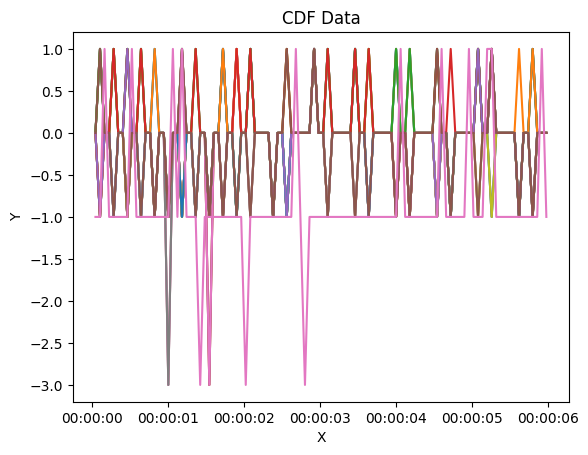

(33124, 1600)


In [5]:
# Plot the data
epoch_r=100
plt.plot(time[:epoch_r], waveform[:epoch_r, :17])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CDF Data')
plt.show()
print(waveform.shape)

In [6]:
for n in range(1):
    waveform = cdf[n]['Waveform'][:]
    # Get the unique values and their counts in the array
    unique, counts = np.unique(waveform, return_counts=True)

    # Print the counts for each unique value
    for val, count in zip(unique, counts):
        print(f"{val}: {count}")

-15: 121842
-13: 2418
-11: 3322
-9: 8316
-7: 23157
-5: 50714
-3: 723514
-1: 22709715
0: 447504
1: 27518939
3: 879507
5: 57582
7: 24595
9: 8928
11: 3482
13: 2496
15: 412369


2017-05-04 00:00:00
index = 49, sclk = 03774:28:239, closest_dt= 2018-04-19 03:18:29.411000


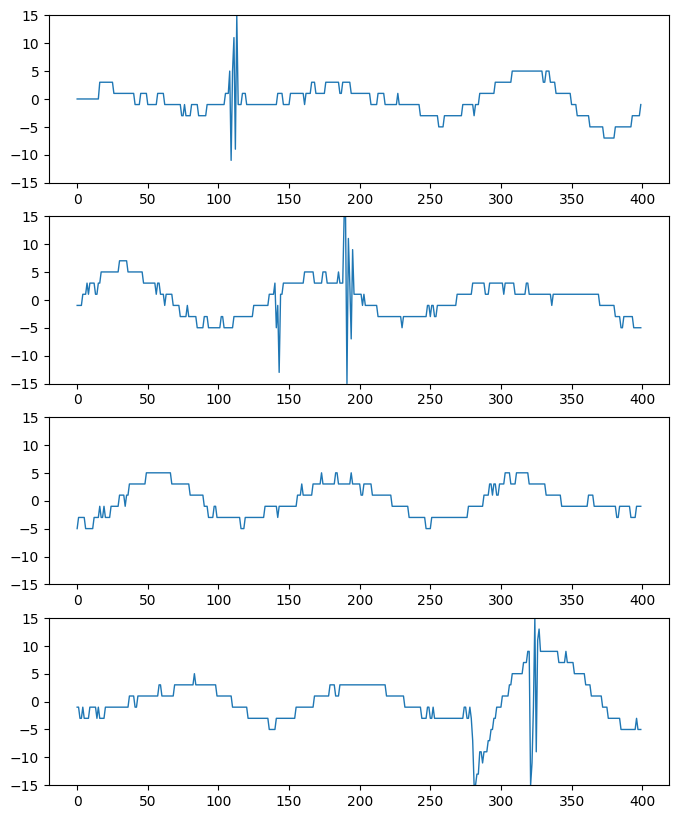

In [7]:
date_str = '2017-05-04'
scet = '00:00:00.000'
dt = datetime.strptime(f"{date_str} {scet}", '%Y-%m-%d %H:%M:%S.%f')
print(dt)

file_path = './data/2018/vg1_pws_wf_2018-04-19T03_v1.0.cdf'
cdf = pycdf.CDF(file_path)
# print(cdf.keys())
cdf=[cdf]

# Read the data from the file
n = 0
time = cdf[n]['Epoch'][:]
part = cdf[n]['Part'][:]
sclk = cdf[n]['SCLK'][:]
waveform = cdf[n]['Waveform'][:]
time_offsets = cdf[n]['timeOffsets'][:]

# print the range of the file
sclk_head, sclk_tail = sclk[0], sclk[-1]
# print(f'head = {sclk_head}, tail = {sclk_tail}')

index = 49
print(f'index = {index}, sclk = {sclk[index]}, closest_dt= {time[index]}')

# Graph
# Create an array with values ranging from -15 to 15
x = waveform[index, :]

# Create a figure with four subplots
fig, axs = plt.subplots(nrows=4, figsize=(8, 10))

# Plot a section of the array in each subplot
axs[0].plot(x[:400], linewidth=1)
axs[1].plot(x[400:800], linewidth=1)
axs[2].plot(x[800:1200], linewidth=1)
axs[3].plot(x[1200:1600], linewidth=1)

# Set the y-axis limits to -15 and 15
for ax in axs:
    ax.set_ylim([-15, 15])

# Show the plot
plt.show()

# Close the CDF file
cdf[n].close()